In [1]:
# Import libraries
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
# Load CSV file
file_path = 'archive/train.csv'
data = pd.read_csv(file_path)


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000774 entries, 0 to 8000773
Data columns (total 21 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Age                int64  
 1   Grade              int64  
 2   Gender             object 
 3   Race               object 
 4   SES_Quartile       int64  
 5   ParentalEducation  object 
 6   SchoolType         object 
 7   Locale             object 
 8   TestScore_Math     float64
 9   TestScore_Reading  float64
 10  TestScore_Science  float64
 11  GPA                float64
 12  AttendanceRate     float64
 13  StudyHours         float64
 14  InternetAccess     int64  
 15  Extracurricular    int64  
 16  PartTimeJob        int64  
 17  ParentSupport      int64  
 18  Romantic           int64  
 19  FreeTime           int64  
 20  GoOut              int64  
dtypes: float64(6), int64(10), object(5)
memory usage: 1.3+ GB


In [9]:
data.head(20)

,Age,Grade,Gender,Race,SES_Quartile,ParentalEducation,SchoolType,Locale,TestScore_Math,TestScore_Reading,...,GPA,AttendanceRate,StudyHours,InternetAccess,Extracurricular,PartTimeJob,ParentSupport,Romantic,FreeTime,GoOut
0,17,12,Female,White,3,HS,Public,Suburban,70.258235,79.665185,...,2.743879,0.906809,1.089243,1,1,0,0,0,2,2
1,18,12,Female,White,2,HS,Public,Suburban,67.876546,59.611505,...,2.587700,0.843739,0.879911,1,1,0,1,0,5,2
2,16,11,Female,White,2,HS,Public,City,62.070623,70.577443,...,2.426294,0.850923,1.003442,1,1,0,1,1,5,1
3,14,9,Female,White,4,Bachelors+,Public,Town,79.909312,82.924450,...,3.558240,0.946786,1.814810,1,1,0,1,0,4,2
4,16,11,Female,Two-or-more,4,SomeCollege,Public,Rural,90.562294,95.352336,...,3.896884,0.988036,1.157241,1,1,0,0,0,3,4
5,14,9,Female,Hispanic,1,SomeCollege,Public,Suburban,74.323709,77.639839,...,2.728882,0.875276,0.800096,1,1,0,0,0,2,2
6,16,11,Female,Black,1,SomeCollege,Private,Suburban,62.068741,71.367186,...,3.058144,0.880969,0.785428,1,0,0,1,0,3,2
7,18,12,Female,White,1,HS,Public,Suburban,73.280029,62.164448,...,2.878577,0.913663,1.533874,1,1,1,0,0,4,1
8,18,12,Female,Hispanic,1,<HS,Public,Suburban,60.588339,74.419737,...,2.841019,0.849471,0.985229,1,1,0,0,1,2,4
9,16,11,Female,White,3,HS,Public,Suburban,73.169137,80.831831,...,2.856098,0.914255,1.088166,1,0,0,0,0,3,3


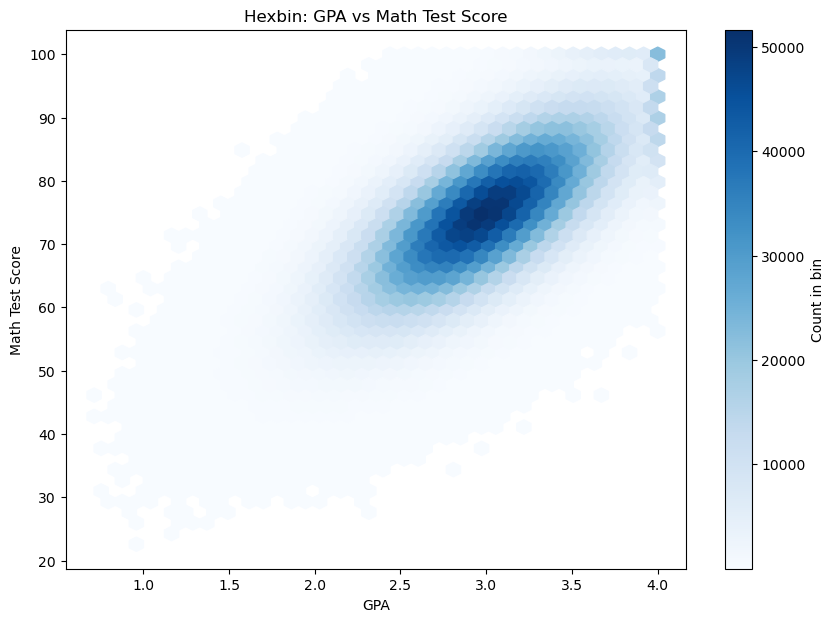

In [35]:
plt.figure(figsize=(10, 7))
plt.hexbin(data['GPA'], data['TestScore_Math'], gridsize=40, cmap='Blues', mincnt=1)
plt.colorbar(label='Count in bin')
plt.title('Hexbin: GPA vs Math Test Score')
plt.xlabel('GPA')
plt.ylabel('Math Test Score')
plt.show()

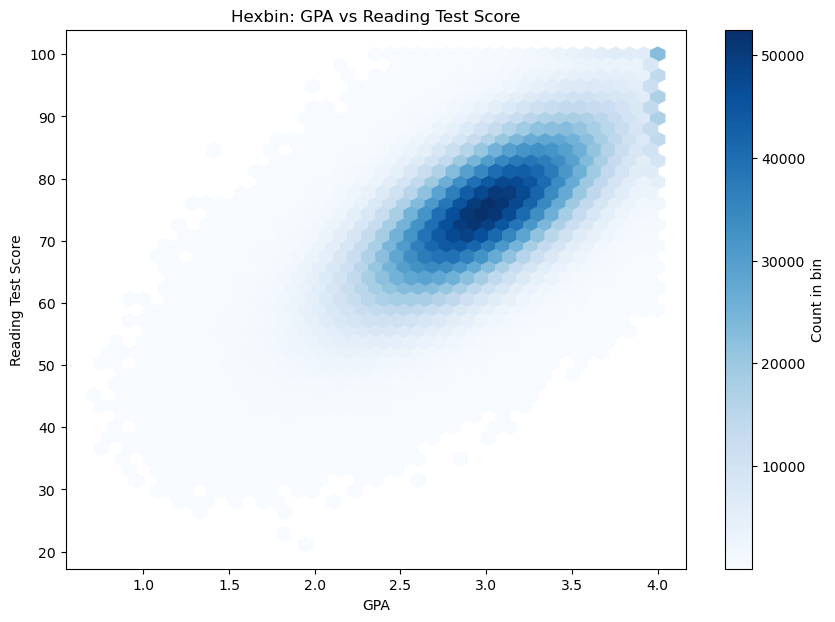

In [37]:
plt.figure(figsize=(10, 7))
plt.hexbin(data['GPA'], data['TestScore_Reading'], gridsize=40, cmap='Blues', mincnt=1)
plt.colorbar(label='Count in bin')
plt.title('Hexbin: GPA vs Reading Test Score')
plt.xlabel('GPA')
plt.ylabel('Reading Test Score')
plt.show()

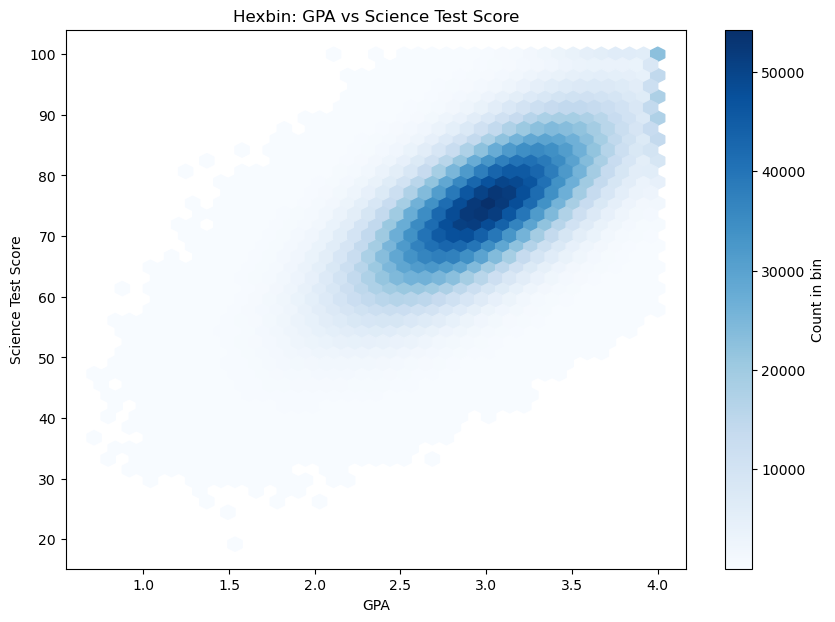

In [38]:
plt.figure(figsize=(10, 7))
plt.hexbin(data['GPA'], data['TestScore_Science'], gridsize=40, cmap='Blues', mincnt=1)
plt.colorbar(label='Count in bin')
plt.title('Hexbin: GPA vs Science Test Score')
plt.xlabel('GPA')
plt.ylabel('Science Test Score')
plt.show()